In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
!nvidia-smi

Sun May 15 09:59:07 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import os 
import pathlib

image_dir = pathlib.Path("/content/drive/MyDrive/data_images")
filepath = list(image_dir.glob(r"**/*.jpeg"))
labels = list(map(lambda x:os.path.split(os.path.split(x)[0])[1], filepath))

In [5]:
import pandas as pd

filepath = pd.Series(filepath, name="Files").astype(str)
labels = pd.Series(labels, name="Labels")

df = pd.concat([filepath, labels], axis=1)
df

,Files,Labels
0,/content/drive/MyDrive/data_images/cats/cat_5....,cats
1,/content/drive/MyDrive/data_images/cats/cat_1....,cats
2,/content/drive/MyDrive/data_images/cats/cat_2....,cats
3,/content/drive/MyDrive/data_images/cats/cat_3....,cats
4,/content/drive/MyDrive/data_images/cats/cat_4....,cats
5,/content/drive/MyDrive/data_images/dogs/dog_1....,dogs
6,/content/drive/MyDrive/data_images/dogs/dog_2....,dogs
7,/content/drive/MyDrive/data_images/dogs/dog_3....,dogs
8,/content/drive/MyDrive/data_images/dogs/dog_4....,dogs
9,/content/drive/MyDrive/data_images/dogs/dog_5....,dogs


In [6]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, train_size=0.8, shuffle=True, random_state=42)
train_df.shape, test_df.shape

((8, 2), (2, 2))

In [8]:
train_gen = ImageDataGenerator(rescale=1/255.,
                               horizontal_flip=True,
                               width_shift_range=0.2,
                               height_shift_range=0.2)

test_gen = ImageDataGenerator(rescale=1/255.)

In [14]:
train_data = train_gen.flow_from_dataframe(dataframe=train_df,
                                           x_col="Files",
                                           y_col="Labels",
                                           target_size=(224, 224),
                                           class_mode="binary",
                                           batch_size=32,
                                           seed=42)

test_data = test_gen.flow_from_dataframe(dataframe=test_df,
                                         x_col="Files",
                                         y_col="Labels",
                                         target_size=(224, 224),
                                         class_mode="binary",
                                         batch_size=32,
                                         seed=42)                                                                           

Found 8 validated image filenames belonging to 2 classes.
Found 2 validated image filenames belonging to 2 classes.


In [17]:
# 1
model = Sequential([
                    Input(shape=(224, 224, 3)),
                    Conv2D(filters=10, kernel_size=3, activation="relu"),
                    MaxPool2D(pool_size=2, padding="valid"),
                    Conv2D(10, 3, activation="relu"),
                    MaxPool2D(),
                    Flatten(),
                    Dense(1, activation="sigmoid")
])

In [23]:
# 2
model.compile(loss="binary_crossentropy",
              optimizer=Adam(),
              metrics=["accuracy"])

In [27]:
# 3
history = model.fit(train_data,
          epochs=10,
          steps_per_epoch=len(train_data),
          validation_data=test_data,
          validation_steps=len(test_data))
          

Epoch 1/10
1/1 [==============================] - 0s 246ms/step - loss: 0.3714 - accuracy: 0.8750 - val_loss: 1.7793 - val_accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 0s 201ms/step - loss: 0.2924 - accuracy: 0.8750 - val_loss: 1.7475 - val_accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 0s 206ms/step - loss: 0.3229 - accuracy: 0.8750 - val_loss: 1.6623 - val_accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 0s 201ms/step - loss: 0.3542 - accuracy: 0.8750 - val_loss: 1.6479 - val_accuracy: 0.5000
Epoch 5/10
1/1 [==============================] - 0s 203ms/step - loss: 0.3509 - accuracy: 0.8750 - val_loss: 1.8081 - val_accuracy: 0.5000
Epoch 6/10
1/1 [==============================] - 0s 198ms/step - loss: 0.2578 - accuracy: 1.0000 - val_loss: 2.0931 - val_accuracy: 0.5000
Epoch 7/10
1/1 [==============================] - 0s 209ms/step - loss: 0.3201 - accuracy: 0.7500 - val_loss: 2.4584 - val_accuracy: 0.5000
Epoch 8/10
1/1 [====

In [28]:
# 4
model.evaluate(test_data)

1/1 [==============================] - 0s 50ms/step - loss: 2.3281 - accuracy: 0.5000


[2.3280513286590576, 0.5]

In [29]:
def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy= history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="test_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="test_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

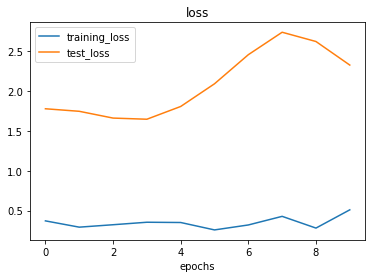

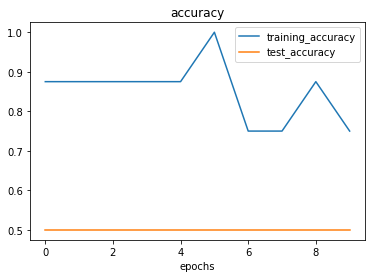

In [30]:
plot_loss_curves(history)

In [31]:
def load_and_convert(filename, img_shape=224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, size=[img_shape, img_shape])
  img = img / 255.
  return img

In [32]:
load_and_convert("test_1.jpeg")

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.65848213, 0.5133841 , 0.6741684 ],
        [0.6625788 , 0.5174808 , 0.6782651 ],
        [0.67391896, 0.5327425 , 0.6817621 ],
        ...,
        [0.7047401 , 0.6067009 , 0.7321911 ],
        [0.70373774, 0.6096201 , 0.7351103 ],
        [0.7019608 , 0.60784316, 0.73333335]],

       [[0.6607756 , 0.5156775 , 0.6764619 ],
        [0.6540354 , 0.50893736, 0.66972166],
        [0.6752188 , 0.53404236, 0.68306196],
        ...,
        [0.69994324, 0.60190403, 0.7273943 ],
        [0.71121323, 0.6170956 , 0.7425858 ],
        [0.7057028 , 0.61158514, 0.7370753 ]],

       [[0.6518163 , 0.5067183 , 0.6675026 ],
        [0.6719669 , 0.5268689 , 0.6876532 ],
        [0.6676777 , 0.52650124, 0.67552084],
        ...,
        [0.7089943 , 0.6109551 , 0.7364453 ],
        [0.7168067 , 0.61960787, 0.74509805],
        [0.70959806, 0.6154804 , 0.7409706 ]],

       ...,

       [[0.5022015 , 0.5022015 , 0.47082895],
        [0.48

In [34]:
model.predict(test_data)

array([[0.9894672],
       [0.9022693]], dtype=float32)

In [42]:
def pred_and_plot(model, filename):
  img = load_and_convert(filename)
  pred = model.predict(tf.expand_dims(img, axis=0))
  pred_class = ""
  for i in pred:
    if pred < 0.5:
      pred_class = "CAT"
    else:
      pred_class = "DOG"
  return pred_class

  plt.imshow(img)
  plt.title(f"Predictions: {pred_class}")
  plt.axis=False

In [46]:
pred_and_plot(model, "test_2.jpeg")

'DOG'